# Load tools

In [ ]:
pip install accelerate -U

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 265.7/265.7 kB 1.7 MB/s eta 0:00:00


In [ ]:
#%pip install "pytorch==1.10.1"
%pip install transformers datasets tensorboard --upgrade

!sudo apt-get install git-lfs

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8.3/8.3 MB 13.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 521.2/521.2 kB 18.5 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 115.3/115.3 kB 14.4 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 134.8/134.8 kB 18.0 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git-lfs is already the newest version (3.0.2-1ubuntu0.2).
0 upgraded, 0 newl

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

# Preprocess & load dataset

In [ ]:
from datasets import load_metric
import numpy as np
from transformers import AutoTokenizer

tokenizer_id = "google/bert_uncased_L-12_H-768_A-12"
tokenizer = AutoTokenizer.from_pretrained(tokenizer_id)

def process(examples):
    tokenized_inputs = tokenizer(
        examples["sentence"], truncation=True, max_length=512
    )
    return tokenized_inputs

# define metrics and metrics function
accuracy_metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    acc = accuracy_metric.compute(predictions=predictions, references=labels)
    return {
        "accuracy": acc["accuracy"],
    }

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

<ipython-input-4-3ae511a5faa6>:15: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library ü§ó Evaluate: https://huggingface.co/docs/evaluate
  accuracy_metric = load_metric("accuracy")


In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer, DataCollatorWithPadding

def create_dataset(dataset_id, dataset_config, tokenizer_id):
  dataset = load_dataset(dataset_id,dataset_config)
  tokenizer = AutoTokenizer.from_pretrained(tokenizer_id)
  data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

  tokenized_datasets = dataset.map(process, batched=True)
  tokenized_datasets = tokenized_datasets.rename_column("label","labels")
  tokenized_datasets["test"].features
  labels = tokenized_datasets["train"].features["labels"].names

  num_labels = len(labels)
  label2id, id2label = dict(), dict()
  for i, label in enumerate(labels):
      label2id[label] = str(i)
      id2label[str(i)] = label

  return num_labels, label2id, id2label, tokenized_datasets, data_collator

In [ ]:
dataset_id="glue"
dataset_config="sst2"
tokenizer_id = "google/bert_uncased_L-12_H-768_A-12" # Base-BERT

num_labels, label2id, id2label, tokenized_datasets, data_collator = create_dataset(dataset_id, dataset_config, tokenizer_id)

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

Map:   0%|          | 0/67349 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Map:   0%|          | 0/1821 [00:00<?, ? examples/s]

# Define Distillation tools

### One-Step Straightforward Distillation


In [ ]:
from transformers import TrainingArguments, Trainer
import torch
import torch.nn as nn
import torch.nn.functional as F

class DistillationTrainingArguments(TrainingArguments):
    def __init__(self, *args, alpha=0.5, temperature=2.0, **kwargs):
        super().__init__(*args, **kwargs)

        self.alpha = alpha
        self.temperature = temperature

class DistillationTrainer(Trainer):
    def __init__(self, *args, teacher_model=None, **kwargs):
        super().__init__(*args, **kwargs)
        self.teacher = teacher_model
        # place teacher on same device as student
        self._move_model_to_device(self.teacher,self.model.device)
        self.teacher.eval()

    def compute_loss(self, model, inputs, return_outputs=False):

        # compute student output
        outputs_student = model(**inputs)
        student_loss=outputs_student.loss
        # compute teacher output
        with torch.no_grad():
          outputs_teacher = self.teacher(**inputs)

        # assert size
        assert outputs_student.logits.size() == outputs_teacher.logits.size()

        # Soften probabilities and compute distillation loss
        loss_function = nn.KLDivLoss(reduction="batchmean")
        loss_logits = (loss_function(
            F.log_softmax(outputs_student.logits / self.args.temperature, dim=-1),
            F.softmax(outputs_teacher.logits / self.args.temperature, dim=-1)) * (self.args.temperature ** 2))
        # Return weighted student loss
        loss = self.args.alpha * student_loss + (1. - self.args.alpha) * loss_logits
        return (loss, outputs_student) if return_outputs else loss

In [ ]:
from transformers import AutoModelForSequenceClassification
from huggingface_hub import HfFolder

def one_step_straightforward_kd(teacher_id, student_id, repo_name='trash', tokenizer= tokenizer,
                                num_labels=num_labels, id2label=id2label, label2id=label2id,
                                tokenized_datasets=tokenized_datasets, data_collator=data_collator,
                                alpha=0.5, temperature=4.0, epochs=7):

  # define training args
  training_args = DistillationTrainingArguments(
      output_dir=repo_name,
      num_train_epochs=epochs,
      per_device_train_batch_size=128,
      per_device_eval_batch_size=128,
      fp16=True,
      learning_rate=6e-5,
      seed=33,
      # logging & evaluation strategies
      logging_dir=f"{repo_name}/logs",
      logging_strategy="epoch", # to get more information to TB
      evaluation_strategy="epoch",
      save_strategy="epoch",
      save_total_limit=2,
      load_best_model_at_end=True,
      metric_for_best_model="accuracy",
      report_to="tensorboard",
      # push to hub parameters
      push_to_hub=True,
      hub_strategy="every_save",
      hub_model_id=repo_name,
      hub_token=HfFolder.get_token(),
      # distilation parameters
      alpha=alpha,
      temperature=temperature
      )

  # define model
  teacher_model = AutoModelForSequenceClassification.from_pretrained(
      teacher_id,
      num_labels=num_labels,
      id2label=id2label,
      label2id=label2id,
  )

  # define student model
  student_model = AutoModelForSequenceClassification.from_pretrained(
      student_id,
      num_labels=num_labels,
      id2label=id2label,
      label2id=label2id,
  )

  trainer = DistillationTrainer(
      student_model,
      training_args,
      teacher_model=teacher_model,
      train_dataset=tokenized_datasets["train"],
      eval_dataset=tokenized_datasets["validation"],
      data_collator=data_collator,
      tokenizer=tokenizer,
      compute_metrics=compute_metrics,
  )

  trainer.train()

### One-Step Multi-Agent Distillation


In [ ]:
from transformers import TrainingArguments, Trainer
import torch
import torch.nn as nn
import torch.nn.functional as F

class MultiAgentDistillationTrainingArguments(TrainingArguments):
    def __init__(self, *args, alpha=0.5, beta1=1/3, beta2=1/3, beta3=1/3, temperature=2.0, **kwargs):
        super().__init__(*args, **kwargs)

        self.alpha = alpha
        self.beta1 = beta1
        self.beta2 = beta2
        self.beta3 = beta3
        self.temperature = temperature

class MultiAgentDistillationTrainer(Trainer):
    def __init__(self, *args, teacher_model1=None, teacher_model2=None, teacher_model3=None, **kwargs):
        super().__init__(*args, **kwargs)
        self.teacher1 = teacher_model1
        self.teacher1.eval()
        self._move_model_to_device(self.teacher1,self.model.device)
        self.teacher2 = teacher_model2
        self.teacher2.eval()
        self._move_model_to_device(self.teacher2,self.model.device)
        self.teacher3 = teacher_model3
        self.teacher3.eval()
        self._move_model_to_device(self.teacher3,self.model.device)
        # place teacher on same device as student


    def compute_loss(self, model, inputs, return_outputs=False):

        # compute student output
        outputs_student = model(**inputs)
        student_loss=outputs_student.loss
        # compute teacher output
        with torch.no_grad():
          outputs_teacher1 = self.teacher1(**inputs)
          outputs_teacher2 = self.teacher2(**inputs)
          outputs_teacher3 = self.teacher3(**inputs)

        # assert size
        assert outputs_student.logits.size() == outputs_teacher1.logits.size()
        assert outputs_student.logits.size() == outputs_teacher2.logits.size()
        assert outputs_student.logits.size() == outputs_teacher3.logits.size()

        # Soften probabilities and compute distillation loss
        loss_function = nn.KLDivLoss(reduction="batchmean")
        loss_logits1 = (loss_function(
            F.log_softmax(outputs_student.logits / self.args.temperature, dim=-1),
            F.softmax(outputs_teacher1.logits / self.args.temperature, dim=-1)) * (self.args.temperature ** 2))
        loss_logits2 = (loss_function(
            F.log_softmax(outputs_student.logits / self.args.temperature, dim=-1),
            F.softmax(outputs_teacher2.logits / self.args.temperature, dim=-1)) * (self.args.temperature ** 2))
        loss_logits3 = (loss_function(
            F.log_softmax(outputs_student.logits / self.args.temperature, dim=-1),
            F.softmax(outputs_teacher3.logits / self.args.temperature, dim=-1)) * (self.args.temperature ** 2))

        # Return weighted student loss
        loss = self.args.alpha * student_loss + (1. - self.args.alpha) * (self.args.beta1*loss_logits1 + self.args.beta2*loss_logits2 + self.args.beta3*loss_logits3)
        return (loss, outputs_student) if return_outputs else loss

In [ ]:
from transformers import AutoModelForSequenceClassification
from huggingface_hub import HfFolder

def one_step_multiagent_kd(teacher_id1, teacher_id2, teacher_id3, student_id, repo_name='trash', tokenizer= tokenizer,
                           num_labels=num_labels, id2label=id2label, label2id=label2id,
                           tokenized_datasets=tokenized_datasets, data_collator=data_collator,
                           alpha=0.5, temperature=4.0, beta1=1/3, beta2=1/3, beta3=1/3, epochs=7):

  # define training args
  training_args = MultiAgentDistillationTrainingArguments(
      output_dir=repo_name,
      num_train_epochs=epochs,
      per_device_train_batch_size=128,
      per_device_eval_batch_size=128,
      fp16=True,
      learning_rate=6e-5,
      seed=33,
      # logging & evaluation strategies
      logging_dir=f"{repo_name}/logs",
      logging_strategy="epoch", # to get more information to TB
      evaluation_strategy="epoch",
      save_strategy="epoch",
      save_total_limit=2,
      load_best_model_at_end=True,
      metric_for_best_model="accuracy",
      report_to="tensorboard",
      # push to hub parameters
      push_to_hub=True,
      hub_strategy="every_save",
      hub_model_id=repo_name,
      hub_token=HfFolder.get_token(),
      # distilation parameters
      alpha=alpha,
      temperature=temperature,
      beta1 = beta1,
      beta2 = beta2,
      beta3 = beta3,
      )

  # define model
  teacher_model1 = AutoModelForSequenceClassification.from_pretrained(
      teacher_id1,
      num_labels=num_labels,
      id2label=id2label,
      label2id=label2id,
  )
  teacher_model2 = AutoModelForSequenceClassification.from_pretrained(
      teacher_id2,
      num_labels=num_labels,
      id2label=id2label,
      label2id=label2id,
  )
  teacher_model3 = AutoModelForSequenceClassification.from_pretrained(
      teacher_id3,
      num_labels=num_labels,
      id2label=id2label,
      label2id=label2id,
  )

  # define student model
  student_model = AutoModelForSequenceClassification.from_pretrained(
      student_id,
      num_labels=num_labels,
      id2label=id2label,
      label2id=label2id,
  )

  trainer = MultiAgentDistillationTrainer(
      student_model,
      training_args,
      teacher_model1=teacher_model1,
      teacher_model2=teacher_model2,
      teacher_model3=teacher_model3,
      train_dataset=tokenized_datasets["train"],
      eval_dataset=tokenized_datasets["validation"],
      data_collator=data_collator,
      tokenizer=tokenizer,
      compute_metrics=compute_metrics,
  )

  trainer.train()

# Experimentation

In [ ]:
base_model = "google/bert_uncased_L-12_H-768_A-12"
medium_model = "google/bert_uncased_L-8_H-512_A-8"
small_model = "google/bert_uncased_L-4_H-512_A-8"
mini_model = "google/bert_uncased_L-4_H-256_A-4"

### Models evaluation

In [ ]:
# Evaluate Base model :

one_step_straightforward_kd(base_model,base_model,alpha=1)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-12_H-768_A-12 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-12_H-768_A-12 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Checkpoint destination directory trash/checkpoint-527 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory trash/checkpoint-1054 already exists and is non-empty.Saving will proceed but saved results may be invalid.


In [ ]:
# Evaluate Medium model :

one_step_straightforward_kd(medium_model,medium_model,alpha=1)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-8_H-512_A-8 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-8_H-512_A-8 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Evaluate Small model :

one_step_straightforward_kd(small_model,small_model,alpha=1)

config.json:   0%|          | 0.00/383 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/116M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-4_H-512_A-8 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-4_H-512_A-8 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Evaluate Mini model :

one_step_straightforward_kd(mini_model,mini_model,alpha=1)

config.json:   0%|          | 0.00/383 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/45.1M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-4_H-256_A-4 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-4_H-256_A-4 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Straightforward Evaluation

In [ ]:
# Straightforward Base to Medium

repo_name = 'straightforwardKD-Medium-from-Base'
one_step_straightforward_kd(base_model,medium_model,repo_name=repo_name)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-12_H-768_A-12 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-8_H-512_A-8 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Straightforward Base to Small

repo_name = 'straightforwardKD-Small-from-Base'
one_step_straightforward_kd(base_model,small_model,repo_name=repo_name)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-12_H-768_A-12 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-4_H-512_A-8 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Straightforward Base to Mini

repo_name = 'straightforwardKD-Mini-from-Base'
one_step_straightforward_kd(base_model,mini_model,repo_name=repo_name)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-12_H-768_A-12 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-4_H-256_A-4 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Successive Evaluation

In [ ]:
# Successive Base to Medium to Small

teacher = 'straightforwardKD-Medium-from-Base'
repo_name='successiveKD-Small'

one_step_straightforward_kd(teacher,small_model,repo_name=repo_name)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-4_H-512_A-8 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Successive Base to Medium to Small to Mini

teacher = 'successiveKD-Small'
repo_name= 'successiveKD-Mini'

one_step_straightforward_kd(teacher,small_model,repo_name=repo_name)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-4_H-512_A-8 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Multi-Agent evaluation

In [ ]:
# Multi Agent Small from Base and Medium

one_step_multiagent_kd(base_model, medium_model, small_model, small_model,
                       beta1=0.5, beta2=0.5, beta3=0)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-12_H-768_A-12 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-8_H-512_A-8 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-4_H-512_A-8 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from

In [ ]:
# Multi Agent Mini from Base, Medium and Small

one_step_multiagent_kd(base_model, medium_model, small_model, mini_model)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-12_H-768_A-12 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-8_H-512_A-8 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-4_H-512_A-8 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from

### Multi-Agent evaluation with successively distilled models

In [ ]:
# Multi Agent Small from Base and distilled Medium

medium_teacher = 'straightforwardKD-Medium-from-Base'

one_step_multiagent_kd(base_model, medium_teacher, small_model, small_model,
                       beta1=0.5, beta2=0.5, beta3=0)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-12_H-768_A-12 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-4_H-512_A-8 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-4_H-512_A-8 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Multi Agent Mini from Base, distilled Medium and successively distilled Small

medium_teacher = 'straightforwardKD-Medium-from-Base'
small_teacher = 'successiveKD-Small'

one_step_multiagent_kd(base_model, medium_model, small_teacher, mini_model)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-12_H-768_A-12 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-8_H-512_A-8 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-4_H-256_A-4 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Results

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
results = {
    'Initial Model' : {'Base-BERT' : 0.917,
              'Medium-BERT': 0.897,
              'Small-BERT': 0.871,
              'Mini-BERT': 0.861},
    'Straightforward KD' : {
              'Medium-BERT': 0.895,
              'Small-BERT': 0.876,
              'Mini-BERT': 0.855},
    'Successive KD' : {
              'Medium-BERT': 0.895,
              'Small-BERT': 0.885,
              'Mini-BERT': 0.881},
    'Multi-Agent KD' : {
              'Small-BERT': 0.883,
              'Mini-BERT': 0.854},
    'Multi-Agent with Successive KD': {
              'Small-BERT': 0.891,
              'Mini-BERT': 0.856}
}

In [ ]:
dico = {'Base-BERT':0, 'Medium-BERT':1, 'Small-BERT':2, 'Mini-BERT':3}

In [ ]:
param_l = [11171074, 28764674, 41374210, 109483778][::-1]
param_sum = sum(param_l)
param_l = [(0.915-0.85)/(109483778-11171074)*i+0.85 for i in param_l]

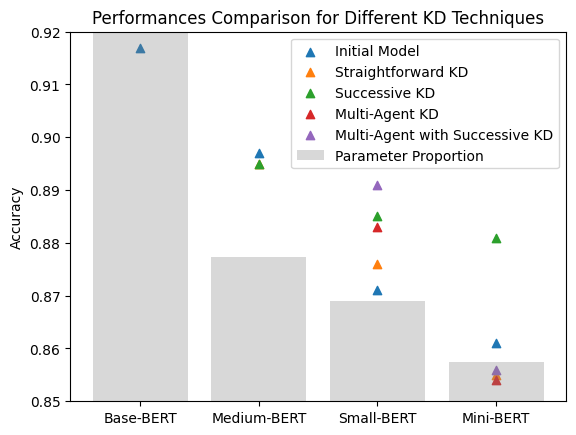

In [ ]:
for key in results.keys():
  plt.scatter([dico[i] for i in results[key]],results[key].values(),marker='^',label=key)
plt.bar([0,1,2,3],param_l,label='Parameter Proportion',alpha=0.3, color='grey')
plt.xticks([0,1,2,3],dico.keys())
plt.ylabel('Accuracy')
plt.ylim([0.85,0.92])
plt.title("Performances Comparison for Different KD Techniques")
plt.legend()

# Profiling

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, AutoConfig
from torch.profiler import profile, record_function, ProfilerActivity

if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
    print("CUDA is not available. Profiling on CPU only.")

student_id = 'marlex7/successiveKD-Mini'

student_model = AutoModelForSequenceClassification.from_pretrained(
    student_id,
    num_labels=num_labels,
    id2label=id2label,
    label2id=label2id,
)

student_model.to(device)

tokenizer_id = "google/bert_uncased_L-12_H-768_A-12"
tokenizer = AutoTokenizer.from_pretrained(tokenizer_id)

input_text = "Random string to do profiling"

inputs = tokenizer(input_text, return_tensors="pt", truncation=True, max_length=512)

inputs = {k: v.to(device) for k, v in inputs.items()}

with profile(activities=[ProfilerActivity.CPU, ProfilerActivity.CUDA], record_shapes=True) as prof:
    with record_function("model_inference"):
        with torch.no_grad():
            student_model(**inputs)

print(prof.key_averages().table(sort_by="cuda_time_total", row_limit=10))



```
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg     Self CUDA   Self CUDA %    CUDA total  CUDA time avg    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                        model_inference        42.40%       3.725ms        99.84%       8.772ms       8.772ms       0.000us         0.00%       1.027ms       1.027ms             1  
                                           aten::linear         2.46%     216.000us        19.29%       1.695ms      65.192us       0.000us         0.00%     776.000us      29.846us            26  
                                            aten::addmm         9.54%     838.000us        13.89%       1.220ms      46.923us     776.000us        75.56%     776.000us      29.846us            26  
void sgemm_largek_lds64<true, false, 6, 3, 4, 5, 2, ...         0.00%       0.000us         0.00%       0.000us       0.000us     403.000us        39.24%     403.000us      50.375us             8  
void gemmSN_TN_kernel<float, 128, 16, 2, 4, 8, 9, fa...         0.00%       0.000us         0.00%       0.000us       0.000us     322.000us        31.35%     322.000us      16.100us            20  
                                       aten::layer_norm         0.49%      43.000us         5.10%     448.000us      49.778us       0.000us         0.00%      72.000us       8.000us             9  
                                aten::native_layer_norm         2.30%     202.000us         4.61%     405.000us      45.000us      72.000us         7.01%      72.000us       8.000us             9  
void at::native::(anonymous namespace)::vectorized_l...         0.00%       0.000us         0.00%       0.000us       0.000us      72.000us         7.01%      72.000us       8.000us             9  
                                           aten::matmul         1.29%     113.000us         6.43%     565.000us      70.625us       0.000us         0.00%      40.000us       5.000us             8  
                                              aten::bmm         2.36%     207.000us         3.14%     276.000us      34.500us      40.000us         3.89%      40.000us       5.000us             8  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
Self CPU time total: 8.786ms
Self CUDA time total: 1.027ms

```

